In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
#load dataset
titanic_data=pd.read_csv("C:/Users/HP/Desktop/aiml/Titanic-Dataset (1).csv")

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#preprocessing-Preprocessing refers to the steps taken to prepare raw data for analysis or modeling
#drop irrelevant colums 
titanic_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
#handling missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
#encoding categorical variables
#used one hot encoding--converts categorical variables into numerical format
#drop_first is used to drop the first level of each categorical variable after one hot encoding
#reducing the risk of multicollinearity
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

In [5]:
# Split data into features and target variable
#it provides reliable predictions on unseen data

X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,1
888,889,3,28.0,1,2,23.4500,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0


In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
331,332,1,45.5,0,0,28.5000,1,0,1
733,734,2,23.0,0,0,13.0000,1,0,1
382,383,3,32.0,0,0,7.9250,1,0,1
704,705,3,26.0,1,0,7.8542,1,0,1
813,814,3,6.0,4,2,31.2750,0,0,1
...,...,...,...,...,...,...,...,...,...
106,107,3,21.0,0,0,7.6500,0,0,1
270,271,1,28.0,0,0,31.0000,1,0,1
860,861,3,41.0,2,0,14.1083,1,0,1
435,436,1,14.0,1,2,120.0000,0,0,1


In [8]:
X_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
709,710,3,28.0,1,1,15.2458,1,0,0
439,440,2,31.0,0,0,10.5000,1,0,1
840,841,3,20.0,0,0,7.9250,1,0,1
720,721,2,6.0,0,1,33.0000,0,0,1
39,40,3,14.0,1,0,11.2417,0,0,0
...,...,...,...,...,...,...,...,...,...
433,434,3,17.0,0,0,7.1250,1,0,1
773,774,3,28.0,0,0,7.2250,1,0,0
25,26,3,38.0,1,5,31.3875,0,0,1
84,85,2,17.0,0,0,10.5000,0,0,1


In [9]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [10]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [11]:
# Feature scaling
#so that there is no data leakage
# class calculates the mean and standard deviation 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.45306593, -1.61413602,  1.25364106, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       [ 1.11387354, -0.40055118, -0.47728355, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       [-0.25427511,  0.81303367,  0.21508629, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       ...,
       [ 1.60890168,  0.81303367,  0.90745614, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       [-0.04768856, -1.61413602, -1.1696534 , ..., -1.38062393,
        -0.30335547,  0.59248936],
       [-1.34567573, -1.61413602, -0.63114352, ...,  0.7243102 ,
        -0.30335547,  0.59248936]])

In [12]:
X_test_scaled

array([[ 1.02032491,  0.81303367, -0.09263364, ...,  0.7243102 ,
        -0.30335547, -1.68779402],
       [-0.03209712, -0.40055118,  0.13815631, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       [ 1.53094449,  0.81303367, -0.7080735 , ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       ...,
       [-1.64581091,  0.81303367,  0.67666619, ..., -1.38062393,
        -0.30335547,  0.59248936],
       [-1.4158372 , -0.40055118, -0.93886345, ..., -1.38062393,
        -0.30335547,  0.59248936],
       [-1.7042788 ,  0.81303367, -1.93895323, ..., -1.38062393,
        -0.30335547,  0.59248936]])

In [13]:
#EDA
#understanding the structure of data
#print few rows
print(titanic_data.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500         1   
1            2         1       1  38.0      1      0  71.2833         0   
2            3         1       3  26.0      0      0   7.9250         0   
3            4         1       1  35.0      1      0  53.1000         0   
4            5         0       3  35.0      0      0   8.0500         1   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  


In [14]:
#info about the structure
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_male     891 non-null    uint8  
 8   Embarked_Q   891 non-null    uint8  
 9   Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB
None


In [15]:
#summary statistics for numerical features
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare    Sex_male  Embarked_Q  Embarked_S  
count  891.000000  891.000000  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    0.647587    0.086420    0.725028  
std      0.806057   49.693429    0.477990    0.281141    0.446751  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    7.910400

In [16]:
# Check for missing values
#indicates wether the element is missing or not
# for data imputation
print(titanic_data.isnull().sum())

# Handle missing values (e.g., imputation)
# Example: Impute missing values with mean
titanic_data.fillna(titanic_data.mean(), inplace=True)


PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


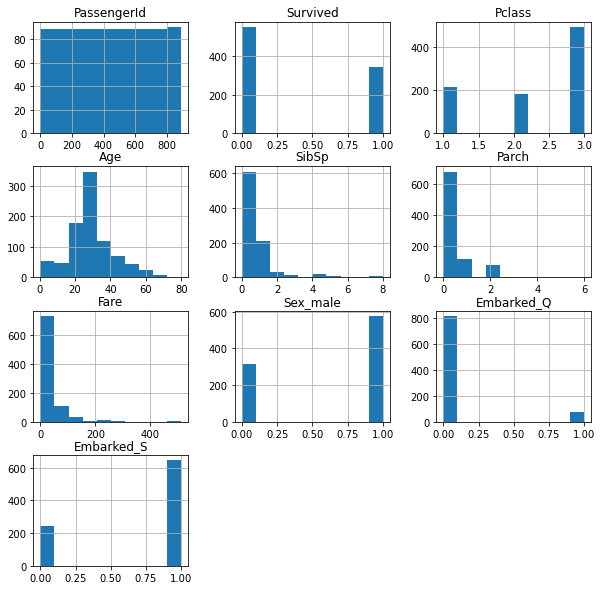

In [17]:
# Histogram of numerical features
#for numerical data
titanic_data.hist(figsize=(10, 10))
plt.show()

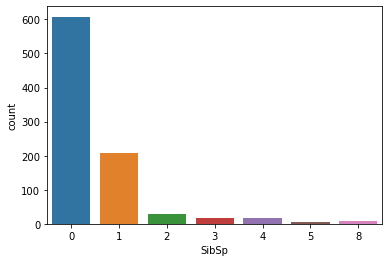

In [18]:
# Bar plot of age variables
sns.countplot(x='SibSp', data=titanic_data)
plt.show()

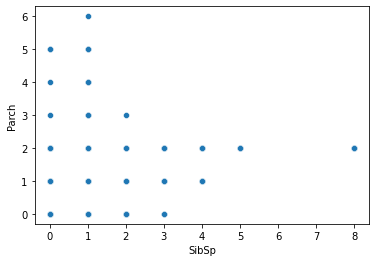

In [19]:
# Scatter plot of two numerical variables
sns.scatterplot(x='SibSp', y='Parch', data=titanic_data)
plt.show()

Logistic Regression Accuracy: 0.8044692737430168
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



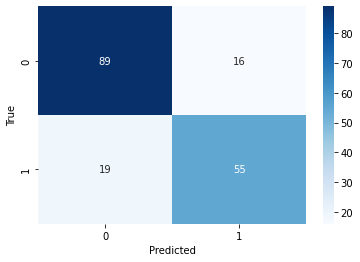

In [20]:

lr_model = LogisticRegression() 
lr_model.fit(X_train_scaled, y_train)  
lr_pred = lr_model.predict(X_test_scaled) 
lr_accuracy = accuracy_score(y_test, lr_pred) 
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:")


print(classification_report(y_test, lr_pred))
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Support Vector Machine Accuracy: 0.8100558659217877
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



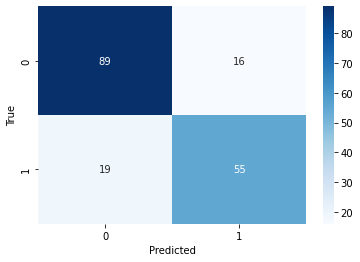

In [21]:

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

svm_pred = svm_model.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_pred)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, svm_pred))
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Decision Tree Accuracy: 0.7206703910614525
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       105
           1       0.66      0.66      0.66        74

    accuracy                           0.72       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.72      0.72      0.72       179



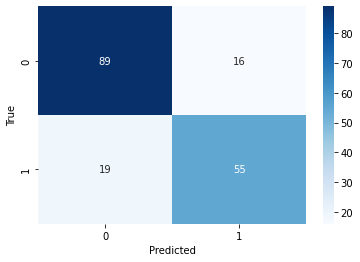

In [22]:
# Decision Tree
dt_model = DecisionTreeClassifier() 
dt_model.fit(X_train, y_train)  
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()